In [1]:
from tensorly.metrics.regression import RMSE
from tensorly.decomposition import parafac
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from parafac_normalization_comparison import *
np.set_printoptions(precision=3)

#parameters
init='svd'
svd='numpy_svd'
rank=5

#hyperspectral image
mat = scipy.io.loadmat('/home/ctuna/tensoptly/benchmark_data/Hyperspectral/Indian_pines_corrected.mat')
image=mat['indian_pines_corrected']

tensor=tl.tensor(image,dtype='float')

normalization_functions=[parafac_normalize_1, parafac_normalize_2, parafac_normalize_3, 
                         parafac_normalize_4, parafac_normalize_5]
time_cp = tl.zeros([5, 5])
errors1 = []
weights1 = []
rec_errors = tl.zeros([5, 5])

1. Normalization at each outer loop (PR)
2. Normalization at each inner loop iteration (last factor is normalized after error calculation)
3. Normalization at the very end
4. 2 and 3 together
5. Current tensorly normalization 

In [2]:
for j in range(5):
  for i in range(5):
     tic = time.time()
     tensornorm, errorsnorm, weights_iter = normalization_functions[i](tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
     weightsnorm, factorsnorm = tensornorm
     cp_reconstructionnorm = tl.cp_to_tensor((weightsnorm, factorsnorm))
     time_cp[i, j] = time.time()-tic
     rec_errors[i, j] = RMSE(tensor,cp_reconstructionnorm)
     
     if j==4:
        weights1.append(weights_iter)
        errors1.append(errorsnorm)

# Error per iteration 

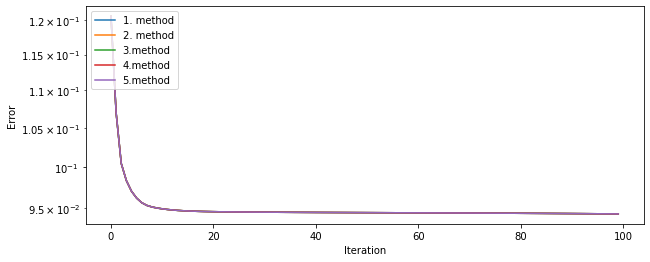

In [3]:
each_iteration(errors1[0], errors1[1], errors1[2], errors1[3], errors1[4])

# Plotting weights per iteration for each method

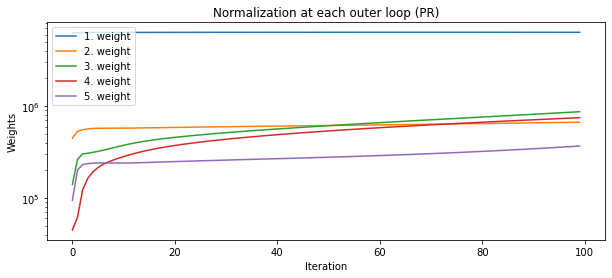

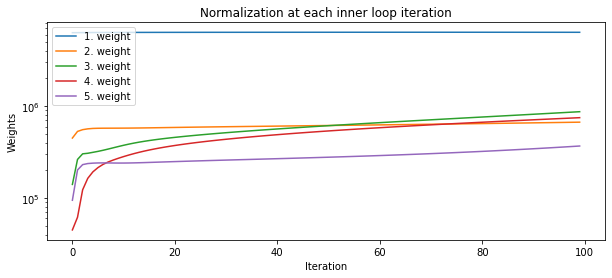

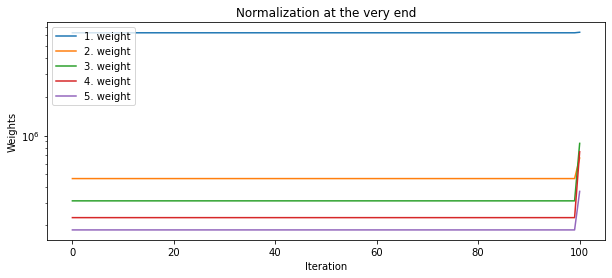

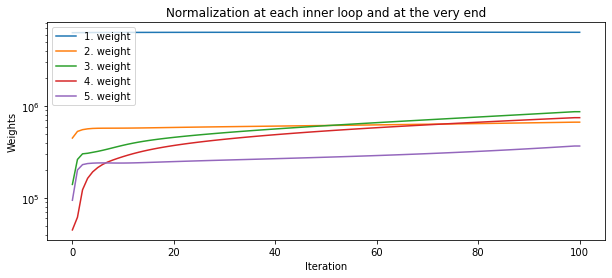

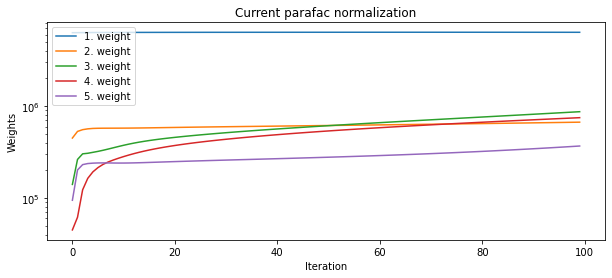

In [4]:
plot_weights(weights1[0], "Normalization at each outer loop (PR)")
plot_weights(weights1[1], "Normalization at each inner loop iteration")
plot_weights(weights1[2], "Normalization at the very end")
plot_weights(weights1[3], "Normalization at each inner loop and at the very end")
plot_weights(weights1[4], "Current parafac normalization")

# Last weights

In [5]:
print("1. Method:"+ str(weights1[0][-1]))
print("2. Method:"+ str(weights1[1][-1]))
print("3. Method:"+ str(weights1[2][-1]))
print("4. Method:"+ str(weights1[3][-1]))
print("5. Method:"+ str(weights1[4][-1]))

1. Method:[6349919.165  668732.815  869199.056  748260.689  368052.206]
2. Method:[6349919.165  668732.815  869199.056  748260.689  368052.206]
3. Method:[6349919.165  668732.815  869199.056  748260.689  368052.206]
4. Method:[6349919.165  668732.815  869199.056  748260.689  368052.206]
5. Method:[6349919.165  668732.815  869199.056  748260.689  368052.206]


# Mean and standard deviation of reconstruction error

In [6]:
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[0, :]))+ ' ' + str("%.3f" % np.std(rec_errors[0, :])))
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[1, :]))+ ' ' + str("%.3f" % np.std(rec_errors[1, :])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[2, :]))+ ' ' + str("%.3f" % np.std(rec_errors[2, :])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[3, :]))+ ' ' + str("%.3f" % np.std(rec_errors[3, :])))                     
print("5. Method:"+ ' ' + str("%.3f" % tl.mean(rec_errors[4, :]))+ ' ' + str("%.3f" % np.std(rec_errors[4, :]))) 

1. Method: 291.874 0.000
2. Method: 291.874 0.000
3. Method: 291.874 0.000
4. Method: 291.874 0.000
5. Method: 291.874 0.000


# Mean and standard deviation of processing time

In [7]:
print("1. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[0, :]))+ ' ' + str("%.3f" % np.std(time_cp[0, :])))
print("2. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[1, :]))+ ' ' + str("%.3f" % np.std(time_cp[1, :])))                     
print("3. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[2, :]))+ ' ' + str("%.3f" % np.std(time_cp[2, :])))                     
print("4. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[3, :]))+ ' ' + str("%.3f" % np.std(time_cp[3, :])))                     
print("5. Method:"+ ' ' + str("%.3f" % tl.mean(time_cp[4, :]))+ ' ' + str("%.3f" % np.std(time_cp[4, :])))  

1. Method: 25.594 0.737
2. Method: 25.549 0.436
3. Method: 25.809 1.160
4. Method: 26.888 1.467
5. Method: 26.172 1.229
